# 血液型シミュレーション

## 0. 知りたいこと
- 各血液型(A, B, O, AB)の人口比はなぜ中途半端な数字で、国によってばらばらなのか？

- 参考：
[国別ABO式血液型割合](https://ja.wikipedia.org/wiki/ABO%E5%BC%8F%E8%A1%80%E6%B6%B2%E5%9E%8B#.E5.9B.BD.E5.88.A5ABO.E5.BC.8F.E8.A1.80.E6.B6.B2.E5.9E.8B.E5.89.B2.E5.90.88)

- [ABO型における親子の理論的な血液型の組み合わせ](https://ja.wikipedia.org/wiki/ABO%E5%BC%8F%E8%A1%80%E6%B6%B2%E5%9E%8B#ABO.E5.9E.8B.E3.81.AB.E3.81.8A.E3.81.91.E3.82.8B.E8.A6.AA.E5.AD.90.E3.81.AE.E7.90.86.E8.AB.96.E7.9A.84.E3.81.AA.E8.A1.80.E6.B6.B2.E5.9E.8B.E3.81.AE.E7.B5.84.E3.81.BF.E5.90.88.E3.82.8F.E3.81.9B)
がこれだけシンプルなら、高校生物のメンデルの法則の問題のように、25%みたいな数字が出てきそうなのに…

## 1. やっていくこと
- 各血液型の人口(割合)の時間変化を表現する微分方程式を立て、数値的に解いてみる
- 平衡点に収束するのか、振動するのか
- 平衡点があるとしたら、各国の血液型比もそれぞれ平衡点になっているのか
- (TODO)：政治的なアレやグローバル化による民族の流入・流出が各国の血液型比に及ぼす/及ぼした影響を予測/説明できるか

## 2. 前提
男女それぞれを遺伝子型（AA, AO, BB, BO, OO, AB）で6種類に分類する。便宜的に遺伝子型の集合を$\Omega = \{AA, AO, BB, BO, OO, AB\}$と表す。

各遺伝子型を持つ男の人数を並べたベクトルを
$$\mathbf{v}^M = (n_{AA}^M, n_{AO}^M, n_{BB}^M, n_{BO}^M, n_{OO}^M, n_{AB}^M)$$

各遺伝子型を持つ女の人数を並べたベクトルを
$$\mathbf{v}^F = (n_{AA}^F, n_{AO}^F, n_{BB}^F, n_{BO}^F, n_{OO}^F, n_{AB}^F)$$

とする。また、各性別の合計人数を以下のように表す。

$$
N^M = \sum_{i \in \Omega} n_i^M = sum(\mathbf{v}^M)
$$
$$
N^F = \sum_{i \in \Omega} n_i^F = sum(\mathbf{v}^F)
$$
全体の人数をNとすると
$$
N = N^M + N^F
$$
が成り立つ。


各表現型A, B, O, ABを持つ人数を、
$$
\begin{align*}
N_{A} &= n_{AA}^M + n_{AO}^M + n_{AA}^F + n_{AO}^F \\
N_{B} &= n_{BB}^M + n_{BO}^M + n_{BB}^F + n_{BO}^F \\
N_{O} &= n_{OO}^M + n_{OO}^F \\
N_{AB} &= n_{AB}^M + n_{AB}^F \\
\end{align*}
$$
と表す。

## 3. 方程式
### 3.1 単純に考えた場合
先述の12個の変数
$$n_{AA}^M, n_{AO}^M, n_{BB}^M, n_{BO}^M, n_{OO}^M, n_{AB}^M, n_{AA}^F, n_{AO}^F, n_{BB}^F, n_{BO}^F, n_{OO}^F, n_{AB}^F$$
の時間変化を微分方程式として表現していく。

例えば、$n_{AA}^M$の時間変化は
$$
\frac{d n_{AA}^M}{dt} = - \alpha \: n_{AA}^M + \beta \: \Bigl( \bigcirc n_{AA}^M n_{AA}^F + \bigcirc n_{AA}^M n_{AO}^F + ... +  \bigcirc n_{AB}^M n_{AB}^F \Bigr)
$$
のように表せる。

ただし、
$$
\begin{align*}
\alpha : 死亡率 \\
\beta : 出生率 \\
\end{align*}
$$


$\beta$のかかった括弧内には$6 \times 6 = 36$個の項があり、例えば$n_{AA}^M n_{AO}^F$ の前の$\bigcirc$には、AAの父親とAOの母親からAAが生まれる確率（この場合0.5）の1/2（男に生まれる確率が1/2として）が入る。

$\beta$ は出会いの確率や出会った後に子供ができる確率を総合的に含んだパラメータであり、ここでは血液型による結婚率が変わらないこと（たとえばA型女性はA型よりもB型の男性に惹かれるという全体的な傾向はない）を仮定している。
（cf. [SIRモデル](https://ja.wikipedia.org/wiki/SIR%E3%83%A2%E3%83%87%E3%83%AB)の$\beta S(t) I(t) $の項）

残りの11個の変数$n_{AA}^F,n_{AO}^M ..., n_{AB}^F$についても同様にして、12個の微分方程式を連立させる。

### 3.2 二次形式(?)による簡略化
上の式で $\beta$ のかかった括弧内の36項はnについて二次の項なので、以下のように表すことができる。
$$
{\mathbf{v}^M}^T {\large M_{AA}} \mathbf{v}^F = (n_{AA}^M, n_{AO}^M, n_{BB}^M, n_{BO}^M, n_{OO}^M, n_{AB}^M)^T {\large M_{AA}} \left(
    \begin{array}{ccc}
      n_{AA}^F \\
      n_{AO}^F \\
      n_{BB}^F \\
      n_{BO}^F \\
      n_{OO}^F \\
      n_{AB}^F \\
    \end{array}
  \right)
$$
ただし、 ${\large M_{AA}}$ は $6 \times 6$ 行列で、 $(i, j)$ 成分は $\omega = ["AA", "AO", "BB", "BO", "OO", "AB"]$として、
$\omega [i]$ と $\omega [j]$ の親から"AA"の子供が生まれる確率になっている $(i, j = 0, 1, ... , 5)$。わりと疎なはず。

より一般には、${\large M_{XY}} (XY \in \Omega)$ の $(i, j)$ 成分は$\omega [i]$ と $\omega [j]$ の親から"XY"の子供が生まれる確率。

このような表現を用いれば、先ほどの式は
$$
\frac{d n_{AA}^M}{dt} = - \alpha \: n_{AA}^M + \frac{1}{2} \beta \: {\mathbf{v}^M}^T {\large M_{AA}} \mathbf{v}^F
$$
AA以外も同様で、一般に $XY \in \Omega$ について
$$
\frac{d n_{XY}^M}{dt} = - \alpha \: n_{XY}^M + \frac{1}{2} \beta \: {\mathbf{v}^M}^T {\large M_{XY}} \mathbf{v}^F
$$
Femaleについても同様に
$$
\frac{d n_{XY}^F}{dt} = - \alpha \: n_{XY}^F + \frac{1}{2} \beta \: {\mathbf{v}^M}^T {\large M_{XY}} \mathbf{v}^F
$$

### 3.3 行列Mの性質
定義より、${\large M_{XY}} (XY \in \Omega)$ の $(i, j)$ 成分は$\omega [i]$ と $\omega [j]$ の親から"XY"の子供が生まれる確率。

したがって${\large M_{XY}} (XY \in \Omega)$ は対称行列である。

### 3.4 全体の人数Nの変化
上述のように、
$$
\frac{d n_{XY}^M}{dt} = - \alpha \: n_{XY}^M + \frac{1}{2} \beta \: {\mathbf{v}^M}^T {\large M_{XY}} \mathbf{v}^F
$$
のような式が6つ、MをFにしたものも6つ、計12個の式が問題となる。
これらを全て足しあわせた時に
$$
\sum_{XY \in \Omega} M_{XY} = \left(
    \begin{array}{ccc}
      1 & 1 & 1 & 1 & 1 & 1 \\
      1 & 1 & 1 & 1 & 1 & 1 \\
      1 & 1 & 1 & 1 & 1 & 1 \\
      1 & 1 & 1 & 1 & 1 & 1 \\
      1 & 1 & 1 & 1 & 1 & 1 \\
      1 & 1 & 1 & 1 & 1 & 1 \\
    \end{array}
  \right)
$$
となるはずであるから、
$$
\frac{d N}{dt} = - \alpha \: N + \beta \: \bigl( n_{AA}^M n_{AA}^F + n_{AA}^M n_{AO}^F + ... +  n_{AB}^M n_{AB}^F  \bigr)
$$
ここで右辺第二項の括弧内は
$$
n_{AA}^M n_{AA}^F + n_{AA}^M n_{AO}^F + ... +  n_{AB}^M n_{AB}^F = (n_{AA}^M + ... + n_{AB}^M) \times (n_{AA}^F + ... + n_{AB}^F)) = N^M \: N^F
$$
であるから、合計Nの変化は
$$
\frac{d N}{dt} = - \alpha \: N + \beta \: N^M \: N^F
$$
右辺のNを$N^M$と$N^F$に分けてかくと
$$
\frac{d N}{dt} = - \alpha \: (N^M + N^F) + \beta \: N^M \: N^F
$$
**全体の人数が不変だと仮定**すると、右辺が0となることから
$$
\frac{\alpha}{\beta} = \frac{N^M \: N^F}{N^M + N^F}
$$
さらに、**男女比が1:1だと仮定**すると$N^M = N^F = \frac{1}{2} \: N$となり
$$
\frac{\alpha}{\beta} = \frac{N}{4}
$$

### 3.5 パラメータの値
$\alpha$は寿命から定まる。$\Delta t$が$1(day)$とすれば、寿命が$365 \times 80(day)$であるから
$$
\alpha = \frac{1}{365 \times 80}
$$
また、先ほどの式より
$$
\frac{\alpha}{\beta} = \frac{N}{4}
$$
であるから、全体の人数を1として正規化すれば
$$
\beta = 4 \: \alpha
$$
として定まる。

## 4. プログラム
### 4.1 準備

In [1]:
# import
import numpy as np
import scipy.integrate as spi
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# parameter
alpha = 1.0 / (365 * 80)
beta = 4 * alpha

In [3]:
# genotype list
genotype = ["AA", "AO", "BB", "BO", "OO", "AB"]
# number of each genotype
v_mf = np.ones(12) / 12. # male and female
print v_mf, sum(v_mf)

[ 0.08333333  0.08333333  0.08333333  0.08333333  0.08333333  0.08333333
  0.08333333  0.08333333  0.08333333  0.08333333  0.08333333  0.08333333] 1.0


### 4.2 Mの作成

In [4]:
mat_list = np.array([np.zeros((6,6)) for _ in range(6)])

mat_listのk番目は、genotypeのk番目を$XY$として、6次正方行列$M_{XY}$となる。

その$(i, j)$ 成分は$genotype [i]$ と $genotype [j]$ の親から"XY"の子供が生まれる確率。

In [5]:
def calc_prob(p1, p2, c):
    """ p1とp2から子供cが生まれる確率を計算。p1, p2, cはgenotypeの要素であるとする。 """
    l = [p1[0]+p2[0], p1[0]+p2[1], p1[1]+p2[0], p1[1]+p2[1]]
    count = 0
    for t in l:
        if (t == c) or (t == c[::-1]):
            count += 1
    return count / 4.

for i in range(6):
    for j in range(6):
        for k in range(6):
            print "遺伝子型{0}, {1}の子供が遺伝子型{2}となる確率：{3}".format(genotype[i],genotype[j], genotype[k],
                                                            calc_prob(genotype[i], genotype[j], genotype[k]))

遺伝子型AA, AAの子供が遺伝子型AAとなる確率：1.0
遺伝子型AA, AAの子供が遺伝子型AOとなる確率：0.0
遺伝子型AA, AAの子供が遺伝子型BBとなる確率：0.0
遺伝子型AA, AAの子供が遺伝子型BOとなる確率：0.0
遺伝子型AA, AAの子供が遺伝子型OOとなる確率：0.0
遺伝子型AA, AAの子供が遺伝子型ABとなる確率：0.0
遺伝子型AA, AOの子供が遺伝子型AAとなる確率：0.5
遺伝子型AA, AOの子供が遺伝子型AOとなる確率：0.5
遺伝子型AA, AOの子供が遺伝子型BBとなる確率：0.0
遺伝子型AA, AOの子供が遺伝子型BOとなる確率：0.0
遺伝子型AA, AOの子供が遺伝子型OOとなる確率：0.0
遺伝子型AA, AOの子供が遺伝子型ABとなる確率：0.0
遺伝子型AA, BBの子供が遺伝子型AAとなる確率：0.0
遺伝子型AA, BBの子供が遺伝子型AOとなる確率：0.0
遺伝子型AA, BBの子供が遺伝子型BBとなる確率：0.0
遺伝子型AA, BBの子供が遺伝子型BOとなる確率：0.0
遺伝子型AA, BBの子供が遺伝子型OOとなる確率：0.0
遺伝子型AA, BBの子供が遺伝子型ABとなる確率：1.0
遺伝子型AA, BOの子供が遺伝子型AAとなる確率：0.0
遺伝子型AA, BOの子供が遺伝子型AOとなる確率：0.5
遺伝子型AA, BOの子供が遺伝子型BBとなる確率：0.0
遺伝子型AA, BOの子供が遺伝子型BOとなる確率：0.0
遺伝子型AA, BOの子供が遺伝子型OOとなる確率：0.0
遺伝子型AA, BOの子供が遺伝子型ABとなる確率：0.5
遺伝子型AA, OOの子供が遺伝子型AAとなる確率：0.0
遺伝子型AA, OOの子供が遺伝子型AOとなる確率：1.0
遺伝子型AA, OOの子供が遺伝子型BBとなる確率：0.0
遺伝子型AA, OOの子供が遺伝子型BOとなる確率：0.0
遺伝子型AA, OOの子供が遺伝子型OOとなる確率：0.0
遺伝子型AA, OOの子供が遺伝子型ABとなる確率：0.0
遺伝子型AA, ABの子供が遺伝子型AAとなる確率：0.5
遺伝子型AA, ABの子供が遺伝子型AOとなる確率：0.0
遺伝子型AA, ABの子供が遺伝子型BBとなる確率：0.0
遺伝子型AA, AB

In [20]:
for t in range(len(genotype)):
    for i in range(len(mat_list[0])):
        for j in range(len(mat_list[0][0])):
            mat_list[t][i][j] = calc_prob(genotype[i], genotype[j], genotype[t])

for m in mat_list:
    assert (m == m.T).all()
assert (sum(mat_list) == np.ones((6,6))).all()

mat_list[0]

array([[ 1.  ,  0.5 ,  0.  ,  0.  ,  0.  ,  0.5 ],
       [ 0.5 ,  0.25,  0.  ,  0.  ,  0.  ,  0.25],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.5 ,  0.25,  0.  ,  0.  ,  0.  ,  0.25]])

### 4.3 方程式
現在のベクトル$\mathbf{v_{mf}}(t_0)$ と時刻 $t_0$ を受け取り、時間微分$\dot{\mathbf{v_{mf}}}(t_0)$を返す関数$f$を作る
$$
\frac{d n_{XY}^M}{dt} = - \alpha \: n_{XY}^M + \frac{1}{2} \beta \: {\mathbf{v}^M}^T {\large M_{XY}} \mathbf{v}^F
$$
$$
\frac{d n_{XY}^F}{dt} = - \alpha \: n_{XY}^F + \frac{1}{2} \beta \: {\mathbf{v}^M}^T {\large M_{XY}} \mathbf{v}^F
$$

In [21]:
for i,g  in enumerate(genotype):
    print i, g

0 AA
1 AO
2 BB
3 BO
4 OO
5 AB


In [22]:
print v_mf[:6], v_mf[6:]
print np.dot(np.dot(v_mf[0:6], mat_list[0]), v_mf[6:12])

[ 0.12605001  0.12600011  0.09809543  0.03412854  0.03890566  0.07682025] [ 0.12930889  0.05809463  0.06111361  0.03397161  0.09515444  0.12235682]
0.0499353849368


In [23]:
def f(v, t0, alpha, beta):
    ret = - alpha * v
    # v[0] to v[5]: male, v[6] to v[11]: female
    for i in range(len(genotype)):
        ret[i] += 0.5 * beta * np.dot(np.dot(v[:6], mat_list[i]), v[6:])
        ret[i+6] += 0.5 * beta * np.dot(np.dot(v[:6], mat_list[i]), v[6:])
    
    return ret

In [24]:
f(v_mf, 1, alpha, beta)

array([ -8.96549261e-07,  -3.26539498e-07,  -1.89444137e-06,
         1.45121644e-06,  -1.81900584e-07,   1.84821427e-06,
        -1.00815489e-06,   1.99899081e-06,  -6.27940701e-07,
         1.45659070e-06,  -2.10822865e-06,   2.88742720e-07])

### 4.4 時間変化をプロット

In [25]:
import numpy.random

In [26]:
v = np.random.rand(12)
v[:6] /= 2 * np.sum(v[:6])
v[6:] /= 2 * np.sum(v[6:])
print v
print np.sum(v[:6]), np.sum(v[6:])

[ 0.09302847  0.03730934  0.078141    0.10413162  0.09014337  0.0972462
  0.03693566  0.06241927  0.13377311  0.01065912  0.10276421  0.15344863]
0.5 0.5


1.0


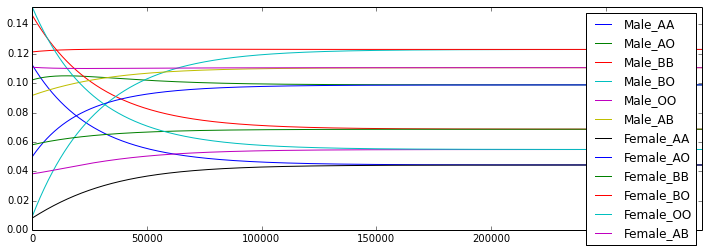

In [27]:
# t=0 to 365*80
t = np.linspace(0., 365*80*10., 365*80*10)
plt.figure(figsize=(12,4));

# scipy ode
# male == femaleにしないとNが一定にならない
#v_mf = np.random.rand(12)
#v_mf /= np.sum(v_mf) 
#v1 = np.random.rand(6)
#v2 = np.random.rand(6)
#v1 /= 2*np.sum(v1)
#v2 /= 2*np.sum(v2)
#v_mf = np.r_[v1, v2]
v_mf = np.random.rand(12)
v_mf[:6] /= 2 * np.sum(v_mf[:6])
v_mf[6:] /= 2 * np.sum(v_mf[6:])
print np.sum(v_mf)


v=spi.odeint(f, v_mf, t, args=(alpha, beta))

labels = ["Male_" + g for g in genotype] + ["Female_" + g for g in genotype]
for i in range(len(v[0])):
    plt.plot(v[:,i], label=labels[i]);

plt.legend();
plt.xlim(0, t[-1]);
plt.ylim(0, np.max(v));

In [28]:
print v[:,0].shape
print t.shape

(292000,)
(292000,)


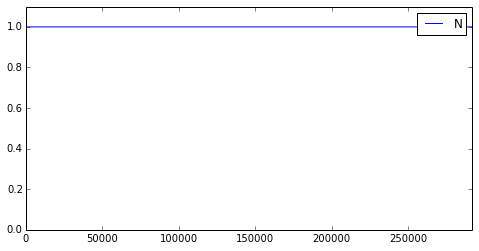

In [29]:
# Plot N
plt.figure(figsize=(8,4));

plt.plot(np.sum(v, axis=1), label="N");

plt.legend();
plt.xlim(0, t[-1]);
plt.ylim(0, 1.1);

(292000, 12) (12, 4) (292000, 4)


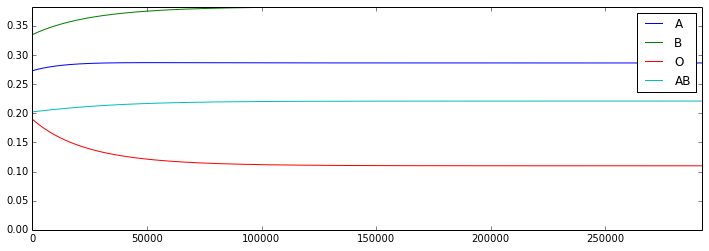

In [30]:
# 各遺伝子型の割合を各表現型の割合に変換する
mask = np.array([np.tile(np.array([1,1,0,0,0,0]), 2),    # A:  AA + AO
              np.tile(np.array([0,0,1,1,0,0]), 2),    # B:  BB + BO
              np.tile(np.array([0,0,0,0,1,0]), 2),    # O:  OO
              np.tile(np.array([0,0,0,0,0,1]), 2)]).T # AB: AB

v2 = np.dot(v, mask)
print v.shape, mask.shape, v2.shape

# t=0 to 365*80
t = np.linspace(0., 365*80*10., 365*80*10)
plt.figure(figsize=(12,4));

la = ["A", "B", "O", "AB"]

for i in range(len(v2[0])):
    plt.plot(v2[:,i], label=la[i]);

plt.legend();
plt.xlim(0, t[-1]);
plt.ylim(0, np.max(v2));

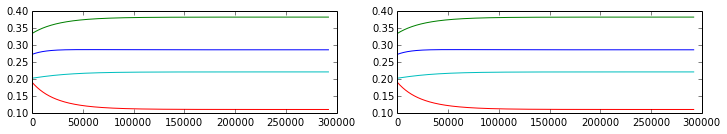

In [31]:
t = np.linspace(0., 365*80*10., 365*80*10)
plt.figure(figsize=(12,4));
plt.subplot(2, 2, 1)
for i in range(len(v2[0])):
    plt.plot(v2[:,i], label=la[i]);
plt.subplot(2, 2, 2)
for i in range(len(v2[0])):
    plt.plot(v2[:,i], label=la[i]);


### Sympy
・xyz = -234

・x + y + z = 20

・5x – y + 2z = 85

を解く例

In [35]:
from sympy import *
from IPython.display import display
init_printing()

In [40]:
x, y, z = symbols('x y z')
display((x, y, z))

eq1 = x * y * z + 234
eq2 = x + y + z - 20
eq3 = 5 * x - y + 2 * z - 85
display(eq1, eq2, eq3)

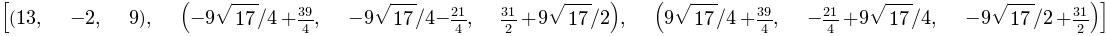

In [41]:
solve([eq1, eq2, eq3], [x, y, z])

In [44]:
Matrix(np.array([[1,2], [3,4]]))

⎡1  2⎤
⎢    ⎥
⎣3  4⎦

In [48]:
x, y= symbols('x y')
Matrix([x, y]).T

[x  y]

In [50]:
Matrix(np.array([[1,2], [3,4]])) * Matrix([x, y])

⎡ x + 2⋅y ⎤
⎢         ⎥
⎣3⋅x + 4⋅y⎦

In [49]:
Matrix([x, y]).T * Matrix(np.array([[1,2], [3,4]]))

[x + 3⋅y  2⋅x + 4⋅y]

In [55]:
display(         Matrix([x, y]).T * Matrix(np.array([[1,2], [3,4]])) * Matrix([x, y]))
display(simplify(Matrix([x, y]).T * Matrix(np.array([[1,2], [3,4]])) * Matrix([x, y])))

[x⋅(x + 3⋅y) + y⋅(2⋅x + 4⋅y)]

⎡ 2              2⎤
⎣x  + 5⋅x⋅y + 4⋅y ⎦

In [59]:
v = Matrix([x, y])
M = Matrix(np.array([[1,2], [3,4]]))
simplify(v.T * M * v)

⎡ 2              2⎤
⎣x  + 5⋅x⋅y + 4⋅y ⎦

- 微分方程式の平衡点が知りたい。時間変化が0となる条件
$$
\frac{d n_{XY}^M}{dt} = 0
$$

$$
\frac{d n_{XY}^F}{dt} = 0
$$
すなわち
$$
- \alpha \: n_{XY}^M + \frac{1}{2} \beta \: {\mathbf{v}^M}^T {\large M_{XY}} \mathbf{v}^F = 0
$$
$$
- \alpha \: n_{XY}^F + \frac{1}{2} \beta \: {\mathbf{v}^M}^T {\large M_{XY}} \mathbf{v}^F = 0
$$
を解けば良い。展開すると、
$$
- \alpha \: n_{XY}^M + \beta \: \Bigl( \bigcirc n_{AA}^M n_{AA}^F + \bigcirc n_{AA}^M n_{AO}^F + ... +  \bigcirc n_{AB}^M n_{AB}^F \Bigr) = 0
$$
$$
- \alpha \: n_{XY}^F + \beta \: \Bigl( \bigcirc n_{AA}^M n_{AA}^F + \bigcirc n_{AA}^M n_{AO}^F + ... +  \bigcirc n_{AB}^M n_{AB}^F \Bigr) = 0
$$

- sympyで解きたいので、上記の式を*や+で表現する

> mat_listのk番目は、genotypeのk番目を$XY$として、6次正方行列$M_{XY}$となる。
その$(i, j)$ 成分は$genotype [i]$ と $genotype [j]$ の親から"XY"の子供が生まれる確率。

In [60]:
n0, n1, n2, n3, n4, n5, n6, n7, n8, n9, n10, n11 = symbols("n0 n1 n2 n3 n4 n5 n6 n7 n8 n9 n10 n11")

In [74]:
v = Matrix([n0, n1, n2, n3, n4, n5, n6, n7, n8, n9, n10, n11])
display(v)
v_m = Matrix(v[:6])
v_f = Matrix(v[6:])
display(v_m, v_f)

⎡n₀ ⎤
⎢   ⎥
⎢n₁ ⎥
⎢   ⎥
⎢n₂ ⎥
⎢   ⎥
⎢n₃ ⎥
⎢   ⎥
⎢n₄ ⎥
⎢   ⎥
⎢n₅ ⎥
⎢   ⎥
⎢n₆ ⎥
⎢   ⎥
⎢n₇ ⎥
⎢   ⎥
⎢n₈ ⎥
⎢   ⎥
⎢n₉ ⎥
⎢   ⎥
⎢n₁₀⎥
⎢   ⎥
⎣n₁₁⎦

⎡n₀⎤
⎢  ⎥
⎢n₁⎥
⎢  ⎥
⎢n₂⎥
⎢  ⎥
⎢n₃⎥
⎢  ⎥
⎢n₄⎥
⎢  ⎥
⎣n₅⎦

⎡n₆ ⎤
⎢   ⎥
⎢n₇ ⎥
⎢   ⎥
⎢n₈ ⎥
⎢   ⎥
⎢n₉ ⎥
⎢   ⎥
⎢n₁₀⎥
⎢   ⎥
⎣n₁₁⎦

In [75]:
Matrix(mat_list[0]) # M_AA

⎡1.0  0.5   0.0  0.0  0.0  0.5 ⎤
⎢                              ⎥
⎢0.5  0.25  0.0  0.0  0.0  0.25⎥
⎢                              ⎥
⎢0.0  0.0   0.0  0.0  0.0  0.0 ⎥
⎢                              ⎥
⎢0.0  0.0   0.0  0.0  0.0  0.0 ⎥
⎢                              ⎥
⎢0.0  0.0   0.0  0.0  0.0  0.0 ⎥
⎢                              ⎥
⎣0.5  0.25  0.0  0.0  0.0  0.25⎦

In [77]:
v_m.T * Matrix(mat_list[0])

[1.0⋅n₀ + 0.5⋅n₁ + 0.5⋅n₅  0.5⋅n₀ + 0.25⋅n₁ + 0.25⋅n₅  0  0  0  0.5⋅n₀ + 0.25⋅
n₁ + 0.25⋅n₅]

In [83]:
display(         v_m.T * Matrix(mat_list[0]) * v_f)
display(simplify(v_m.T * Matrix(mat_list[0]) * v_f))
hoge = v_m.T * Matrix(mat_list[0]) * v_f

[n₁₁⋅(0.5⋅n₀ + 0.25⋅n₁ + 0.25⋅n₅) + n₆⋅(1.0⋅n₀ + 0.5⋅n₁ + 0.5⋅n₅) + n₇⋅(0.5⋅n₀
 + 0.25⋅n₁ + 0.25⋅n₅)]

[n₁₁⋅(0.5⋅n₀ + 0.25⋅n₁ + 0.25⋅n₅) + n₆⋅(1.0⋅n₀ + 0.5⋅n₁ + 0.5⋅n₅) + n₇⋅(0.5⋅n₀
 + 0.25⋅n₁ + 0.25⋅n₅)]

In [89]:
hoge[0] + x

In [92]:
(v_m.T * Matrix(mat_list[0]) * v_f)[0]

In [81]:
# parameter
alpha, beta = symbols("alpha, beta")

In [82]:
S(1)/2

In [95]:
- alpha * n0 + S(1)/2 * beta

In [103]:
q1 = v_m.T * Matrix(mat_list[0]) * v_f
display(q1)
e1 = - alpha * n0 + S(1)/2 * beta * q1[0]
display(e1)

[n₁₁⋅(0.5⋅n₀ + 0.25⋅n₁ + 0.25⋅n₅) + n₆⋅(1.0⋅n₀ + 0.5⋅n₁ + 0.5⋅n₅) + n₇⋅(0.5⋅n₀
 + 0.25⋅n₁ + 0.25⋅n₅)]

In [104]:
e1 = - alpha * n0 + S(1)/2 * beta * (v_m.T * Matrix(mat_list[0]) * v_f)[0]
display(e1)

In [105]:
type(e1)

sympy.core.add.Add

In [110]:
for i, n in enumerate(v):
    print i%6, n

0 n0
1 n1
2 n2
3 n3
4 n4
5 n5
0 n6
1 n7
2 n8
3 n9
4 n10
5 n11


In [109]:
mat_list.shape

In [112]:
e_list = []
for i, n in enumerate(v):
    expr = - alpha * n + S(1)/2 * beta * (v_m.T * Matrix(mat_list[i%6]) * v_f)[0]
    e_list.append(expr)

In [114]:
for expr in e_list:
    display(expr)
    print

In [115]:
solve(e_list, [n0, n1, n2, n3, n4, n5, n6, n7, n8, n9, n10, n11])

KeyboardInterrupt: 

In [41]:
mat_list.shape

In [47]:
genotype

['AA', 'AO', 'BB', 'BO', 'OO', 'AB']

xi: genotype[i]のMaleの数$n^M_{XY} (i=0, 1, ..., 5)$

xi: genotype[i-6]のFemaleの数$n^F_{XY} (i=6, 7, ..., 11)$

In [49]:
x_i = ["x" + str(i) for i in range(12)]
print x_i

['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11']


In [52]:
# dx0/dt = 0
mul = [i + "*" + j for i in x_i for j in x_i]
print len(mul)
print mul

144
['x0*x0', 'x0*x1', 'x0*x2', 'x0*x3', 'x0*x4', 'x0*x5', 'x0*x6', 'x0*x7', 'x0*x8', 'x0*x9', 'x0*x10', 'x0*x11', 'x1*x0', 'x1*x1', 'x1*x2', 'x1*x3', 'x1*x4', 'x1*x5', 'x1*x6', 'x1*x7', 'x1*x8', 'x1*x9', 'x1*x10', 'x1*x11', 'x2*x0', 'x2*x1', 'x2*x2', 'x2*x3', 'x2*x4', 'x2*x5', 'x2*x6', 'x2*x7', 'x2*x8', 'x2*x9', 'x2*x10', 'x2*x11', 'x3*x0', 'x3*x1', 'x3*x2', 'x3*x3', 'x3*x4', 'x3*x5', 'x3*x6', 'x3*x7', 'x3*x8', 'x3*x9', 'x3*x10', 'x3*x11', 'x4*x0', 'x4*x1', 'x4*x2', 'x4*x3', 'x4*x4', 'x4*x5', 'x4*x6', 'x4*x7', 'x4*x8', 'x4*x9', 'x4*x10', 'x4*x11', 'x5*x0', 'x5*x1', 'x5*x2', 'x5*x3', 'x5*x4', 'x5*x5', 'x5*x6', 'x5*x7', 'x5*x8', 'x5*x9', 'x5*x10', 'x5*x11', 'x6*x0', 'x6*x1', 'x6*x2', 'x6*x3', 'x6*x4', 'x6*x5', 'x6*x6', 'x6*x7', 'x6*x8', 'x6*x9', 'x6*x10', 'x6*x11', 'x7*x0', 'x7*x1', 'x7*x2', 'x7*x3', 'x7*x4', 'x7*x5', 'x7*x6', 'x7*x7', 'x7*x8', 'x7*x9', 'x7*x10', 'x7*x11', 'x8*x0', 'x8*x1', 'x8*x2', 'x8*x3', 'x8*x4', 'x8*x5', 'x8*x6', 'x8*x7', 'x8*x8', 'x8*x9', 'x8*x10', 'x8*x11', 'x9*x

In [ ]:
mat_list[0]